In [23]:
import pandas as pd
import os
import sqlite3
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder

In [2]:
# connect sqlite
conn = sqlite3.connect('mock_data.db')

print ("Initiated successfully")

Initiated successfully


In [4]:
# get data
df_db = conn.execute("SELECT * FROM MOCK_ML").fetchall()

In [8]:
cols=["Mk","Category Type Approved" ,"Category Registered" ,"Mass (kg)","CO2 (g/km)" ,"W (mm)","Steering Axle (mm)" ,"Other Axle (mm)" , "Ft" ,"Fm" ,"Engine Capacity (cm3)","Engine Power (KW)"]

In [28]:
ml_mock = pd.DataFrame(df_db, columns=cols)
ml_mock

,Mk,Category Type Approved,Category Registered,Mass (kg),CO2 (g/km),W (mm),Steering Axle (mm),Other Axle (mm),Ft,Fm,Engine Capacity (cm3),Engine Power (KW)
0,RENAULT,M1,M1,1253,95,2606,1531,1531,DIESEL,M,1461,66
1,RENAULT,M1,M1,1253,95,2606,1531,1531,DIESEL,M,1461,66
2,RENAULT,M1,M1,1253,95,2606,1531,1531,DIESEL,M,1461,66
3,RENAULT,M1,M1,1253,95,2606,1531,1531,DIESEL,M,1461,66
4,RENAULT,M1,M1,1253,95,2606,1531,1531,DIESEL,M,1461,66
...,...,...,...,...,...,...,...,...,...,...,...,...
6481,FIAT,M1,M1,1410,110,2636,1542,1543,Diesel,M,1598,88
6482,FIAT,M1,M1,1410,110,2636,1542,1543,Diesel,M,1598,88
6483,FIAT,M1,M1,1410,110,2636,1542,1543,Diesel,M,1598,88
6484,FIAT,M1,M1,1411,110,2636,1542,1543,Diesel,M,1598,88


In [29]:
ml_mock['Ft'] = ml_mock['Ft'].str.capitalize()
ml_mock

,Mk,Category Type Approved,Category Registered,Mass (kg),CO2 (g/km),W (mm),Steering Axle (mm),Other Axle (mm),Ft,Fm,Engine Capacity (cm3),Engine Power (KW)
0,RENAULT,M1,M1,1253,95,2606,1531,1531,Diesel,M,1461,66
1,RENAULT,M1,M1,1253,95,2606,1531,1531,Diesel,M,1461,66
2,RENAULT,M1,M1,1253,95,2606,1531,1531,Diesel,M,1461,66
3,RENAULT,M1,M1,1253,95,2606,1531,1531,Diesel,M,1461,66
4,RENAULT,M1,M1,1253,95,2606,1531,1531,Diesel,M,1461,66
...,...,...,...,...,...,...,...,...,...,...,...,...
6481,FIAT,M1,M1,1410,110,2636,1542,1543,Diesel,M,1598,88
6482,FIAT,M1,M1,1410,110,2636,1542,1543,Diesel,M,1598,88
6483,FIAT,M1,M1,1410,110,2636,1542,1543,Diesel,M,1598,88
6484,FIAT,M1,M1,1411,110,2636,1542,1543,Diesel,M,1598,88


In [30]:
# Check columns
ml_mock.columns

Index(['Mk', 'Category Type Approved', 'Category Registered', 'Mass (kg)',
       'CO2 (g/km)', 'W (mm)', 'Steering Axle (mm)', 'Other Axle (mm)', 'Ft',
       'Fm', 'Engine Capacity (cm3)', 'Engine Power (KW)'],
      dtype='object')

In [46]:
ml_mock.describe()

,Mk,Category Type Approved,Category Registered,Mass (kg),CO2 (g/km),W (mm),Steering Axle (mm),Other Axle (mm),Ft,Fm,Engine Capacity (cm3),Engine Power (KW)
count,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000
mean,15.662504,0.009405,0.009405,1329.225871,112.142923,2641.277983,1532.854918,1531.793864,1.828554,0.994912,1466.822695,84.982424
std,6.753031,0.096529,0.096529,253.593802,18.670608,175.829499,57.742595,59.673369,1.457882,0.071153,398.591303,28.708988
min,0.000000,0.000000,0.000000,930.000000,22.000000,2300.000000,1409.000000,1407.000000,0.000000,0.000000,875.000000,44.000000
25%,12.000000,0.000000,0.000000,1137.000000,98.000000,2538.000000,1495.000000,1486.000000,0.000000,1.000000,1197.000000,66.000000
50%,19.000000,0.000000,0.000000,1334.000000,113.000000,2638.000000,1540.000000,1540.000000,3.000000,1.000000,1461.000000,81.000000
75%,20.000000,0.000000,0.000000,1473.000000,119.750000,2699.000000,1574.000000,1577.000000,3.000000,1.000000,1598.000000,96.000000
max,25.000000,1.000000,1.000000,2595.000000,218.000000,3498.000000,1810.000000,1810.000000,5.000000,1.000000,3456.000000,307.000000


In [31]:
# Check columns type
ml_mock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6486 entries, 0 to 6485
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Mk                      6486 non-null   object
 1   Category Type Approved  6486 non-null   object
 2   Category Registered     6486 non-null   object
 3   Mass (kg)               6486 non-null   int64 
 4   CO2 (g/km)              6486 non-null   int64 
 5   W (mm)                  6486 non-null   int64 
 6   Steering Axle (mm)      6486 non-null   int64 
 7   Other Axle (mm)         6486 non-null   int64 
 8   Ft                      6486 non-null   object
 9   Fm                      6486 non-null   object
 10  Engine Capacity (cm3)   6486 non-null   int64 
 11  Engine Power (KW)       6486 non-null   int64 
dtypes: int64(7), object(5)
memory usage: 608.2+ KB


In [32]:
def Encoder(df):
          columnsToEncode = list(df.select_dtypes(include=['object']))
          le = LabelEncoder()
          for feature in columnsToEncode:
              try:
                  df[feature] = le.fit_transform(df[feature])
              except:
                  print('Error encoding '+feature)
          return df

In [33]:
ml_mock_transform = Encoder(ml_mock)
ml_mock_transform

,Mk,Category Type Approved,Category Registered,Mass (kg),CO2 (g/km),W (mm),Steering Axle (mm),Other Axle (mm),Ft,Fm,Engine Capacity (cm3),Engine Power (KW)
0,20,0,0,1253,95,2606,1531,1531,0,1,1461,66
1,20,0,0,1253,95,2606,1531,1531,0,1,1461,66
2,20,0,0,1253,95,2606,1531,1531,0,1,1461,66
3,20,0,0,1253,95,2606,1531,1531,0,1,1461,66
4,20,0,0,1253,95,2606,1531,1531,0,1,1461,66
...,...,...,...,...,...,...,...,...,...,...,...,...
6481,5,0,0,1410,110,2636,1542,1543,0,1,1598,88
6482,5,0,0,1410,110,2636,1542,1543,0,1,1598,88
6483,5,0,0,1410,110,2636,1542,1543,0,1,1598,88
6484,5,0,0,1411,110,2636,1542,1543,0,1,1598,88


<AxesSubplot:>

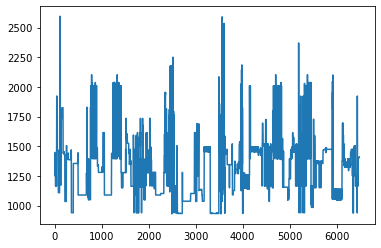

In [34]:
ml_mock['Mass (kg)'].plot() 

<AxesSubplot:>

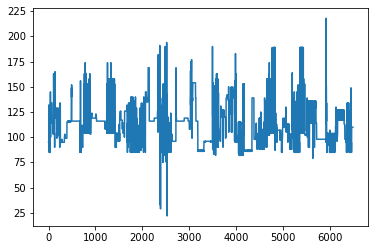

In [35]:
ml_mock['CO2 (g/km)'].plot()

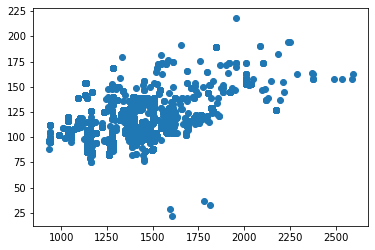

In [36]:
# CO2 with mass
import matplotlib.pyplot as plt
plt.scatter(ml_mock['Mass (kg)'],ml_mock['CO2 (g/km)'])

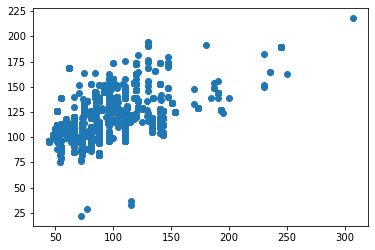

In [37]:
# CO2 with Engine Power
import matplotlib.pyplot as plt
plt.scatter(ml_mock['Engine Power (KW)'],ml_mock['CO2 (g/km)'])

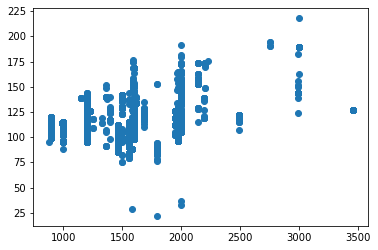

In [38]:
# CO2 with Engine Capacity
import matplotlib.pyplot as plt
plt.scatter(ml_mock['Engine Capacity (cm3)'],ml_mock['CO2 (g/km)'])

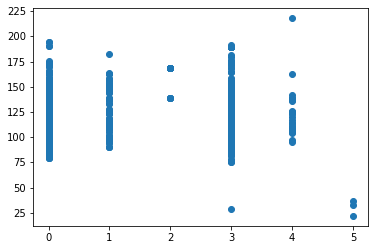

In [39]:
plt.scatter(ml_mock['Ft'],ml_mock['CO2 (g/km)'])

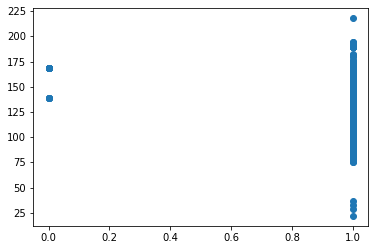

In [40]:
plt.scatter(ml_mock['Fm'],ml_mock['CO2 (g/km)'])

In [41]:
# Independent and dependent variables
x = ml_mock[['Mass (kg)','W (mm)','Steering Axle (mm)','Other Axle (mm)', 'Ft', 'Fm', 'Engine Capacity (cm3)','Engine Power (KW)']]
y = ml_mock['CO2 (g/km)']

In [42]:
# Splitting into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [43]:
# Training linear regression model on training dataset
from sklearn.linear_model import LinearRegression
lin=LinearRegression()
lin.fit(x_train,y_train)
print("Training data score:", lin.score(x_train,y_train))
print("Testing data score: ", lin.score(x_test,y_test))

Training data score: 0.5242034586229347
Testing data score:  0.5504068458303699


In [44]:
# Prediction from model
LR_prediction = lin.predict(x_test)

In [45]:
# Model accuracy
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error
print("Mean-Squared Error:",mean_squared_error(y_test,LR_prediction))
print("Explained Variance Score:",explained_variance_score(y_test, LR_prediction))
print("r2_Score:",r2_score(y_test,LR_prediction))

Mean-Squared Error: 157.57633819491505
Explained Variance Score: 0.5504068869172993
r2_Score: 0.5504068458303699


In [47]:
# Prediction
predictedCO2 =lin.predict([[1329,2641,1533,1532,3,1,1467,85]])
print(predictedCO2)

[116.94675504]
